In [1]:
import numpy as np
import jax.numpy as jnp
import jax

import matplotlib.pyplot as plt
from rikabplotlib.plot_utils import newplot, hist_with_outline, hist_with_errors


# energyflow imports
from energyflow.datasets import qg_jets
from energyflow.utils import data_split, to_categorical


from rikabplotlib.plot_utils import newplot, hist_with_outline, hist_with_errors


2025-01-20 01:10:50.011782: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
/home/rikab/miniconda3/envs/SHAPER/lib/python3.8/site-packages/ot/backend.py:2998: UserWarning: To use TensorflowBackend, you need to activate the tensorflow numpy API. You can activate it by running: 
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
  register_backend(TensorflowBackend())


In [2]:
N_jets = 25000
R = 0.4
X, y = qg_jets.load(N_jets)
E0 = 500

# Jet only jets with y = 1
X = X[y == 1][:N_jets]

# Preprocess
X = X[:,:,:3]
total_energy = np.sum(X[:,:,0], axis=1)
masses = []
for x in X:
    mask = x[:,0] > 0
    yphi_avg = np.average(x[mask,1:3], weights=x[mask,0], axis=0)
    x[mask,1:3] -= yphi_avg

    # Calculate the mass given the pT, eta, phi
    # m = sqrt(E^2 - p^2)
    e = np.sum(x[:,0] * np.cosh(x[:,1]))
    px = np.sum(x[:,0] * np.cos(x[:,2]))
    py = np.sum(x[:,0] * np.sin(x[:,2]))
    pz = np.sum(x[:,0] * np.sinh(x[:,1]))

    m = np.sqrt(e**2 - px**2 - py**2 - pz**2)
    masses.append(m)

masses = np.array(masses)






In [3]:
# def p_rho(rho, alpha, params):

#     C_F = 4/3
#     return alpha * C_F / jnp.pi / rho * (jnp.log(1/rho) - 3/4)

# def p_rho2_no_hard(rho, alpha, params):

#     C_F = 4/3
#     return alpha * C_F / jnp.pi / rho * (jnp.log(1/rho))

# def p_rho_LL(rho, alpha, params):

#     C_F = 4/3
#     return alpha* C_F / jnp.pi / rho * (jnp.log(1/rho) - 3/4) * jnp.exp(- alpha * C_F / (2 * jnp.pi ) * (jnp.log(1/rho)**2 - 3/2 * jnp.log(1/rho)))


# def test(rho, alpha, params):
#     return np.log(1/rho) / rho * np.exp(- alpha * (np.log(1/rho)**2 ))

# rhos = jnp.linspace(0.00000001, 1, 1000000)
# alpha = 0.118
# params = None

# p_rho2s = p_rho(rhos, alpha, params)
# p_rho2s_LL = p_rho_LL(rhos, alpha, params)
# p_rho2s_no_hard = p_rho2_no_hard(rhos, alpha, params)
# p_test = test(rhos, alpha, params)

# # print integrals
# print(jnp.trapz(p_rho2s, rhos))
# print(jnp.trapz(p_rho2s_LL, rhos))
# print(jnp.trapz(p_rho2s_no_hard, rhos))
# print(jnp.trapz(p_test, rhos))

# print(np.exp(-1/np.sqrt(alpha * 4/3 / np.pi)))



# fig, ax = newplot("full")
# ax.plot(rhos,  p_rho2s, label="L.O.", color = "Black")
# ax.plot(rhos,  p_rho2s_LL, label="L.L.", color = "grey", linestyle = "--")
# ax.plot(rhos, p_rho_LL(rhos, 0.999, params))
# ax.plot(rhos, p_rho_LL(rhos, 0.5, params))
# ax.plot(rhos, p_rho_LL(rhos, 0.25, params))
# ax.plot(rhos, p_rho_LL(rhos, 0.1, params))

# bins = np.logspace(-6, 0, 100)
# hist_with_outline(ax, masses **2 /(R**2 * 500**2), bins = 100, range = (0,1), color = "red", label = "Data", density = True)

# ax.axhline(0, color = "black", linestyle = "--")


# plt.xscale("log")
# plt.yscale("log")
# # plt.ylim(1e-6, 1e6)

# plt.xlabel(r"$\rho$")
# plt.ylabel(r"$p(\rho)$")


# plt.legend()













# fig, ax = newplot("full")
# ax.plot(np.log10(rhos), rhos *  p_rho2s, label="L.O.", color = "Black")
# ax.plot(np.log10(rhos),  rhos * p_rho2s_LL, label="L.L.", color = "grey", linestyle = "--")
# ax.plot(np.log10(rhos), rhos * p_rho_LL(rhos, 0.999, params))
# ax.plot(np.log10(rhos), rhos * p_rho_LL(rhos, 0.5, params))
# ax.plot(np.log10(rhos), rhos * p_rho_LL(rhos, 0.25, params))
# ax.plot(np.log10(rhos), rhos * p_rho_LL(rhos, 0.1, params))

# bins = np.logspace(-6, 0, 100)
# hist_with_outline(ax, np.log10(masses **2 /(R**2 * 500**2)), bins = 100, range = (-10,0), color = "red", label = "Data", density = True)

# ax.axhline(0, color = "black", linestyle = "--")
# lambda_qcd = 0.2
# rho_lambda_qcd = (lambda_qcd / (500 * R))**2
# print(rho_lambda_qcd)
# ax.axvline(np.log10(rho_lambda_qcd), color = "black", linestyle = "--", label = r"$\Lambda_{QCD}$")


# # plt.xscale("log")
# # plt.yscale("log")
# # plt.ylim(1e-6, 1e6)

# plt.xlim(-6, 0)
# plt.xlabel(r"$\log(\rho)$")
# plt.ylabel(r"$p(\log(\rho))$")


# plt.legend()

# Thrust

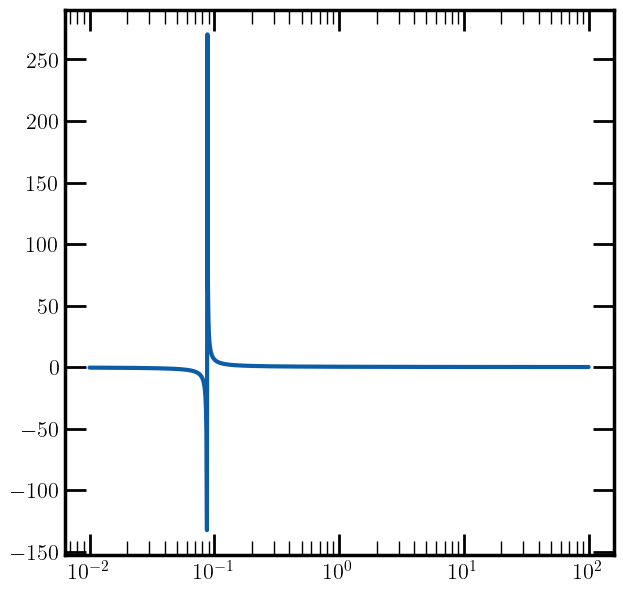

In [4]:
from utils.qcd_utils import running_coupling   

fig, ax = newplot("full")
mz = 91.1876
mus = np.logspace(-2, 2, 1000)
alpha_s = running_coupling(0.118, mz, mus)
ax.plot(mus, alpha_s, label = r"$\alpha_s$")
plt.xscale("log")

0.9995391765648507


/tmp/ipykernel_62595/1313296928.py:18: RuntimeWarning: divide by zero encountered in true_divide
  return alpha_s / (2 * np.pi) * C_F * (2 * (3*T**2 - 3*T + 2) / T / x * np.log((2*T - 1) / x) - 3 * (3*T -2) * (2 - T) / (1-T))
/tmp/ipykernel_62595/1313296928.py:18: RuntimeWarning: invalid value encountered in log
  return alpha_s / (2 * np.pi) * C_F * (2 * (3*T**2 - 3*T + 2) / T / x * np.log((2*T - 1) / x) - 3 * (3*T -2) * (2 - T) / (1-T))


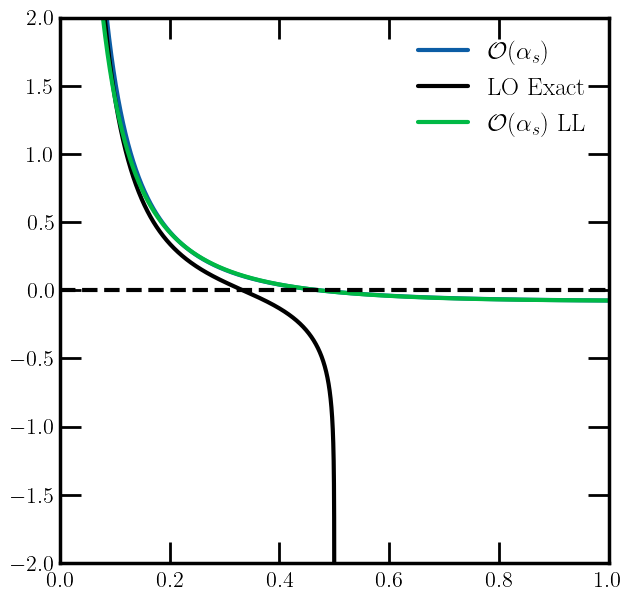

In [40]:
C_F = 4/3
C_A = 3
T_F = 1/2
n_f = 5
zeta_3 = 1.20205690315959
zeta_5 = 1.03692775514337
c_2CF_S = 58.00 # +-2
c_2CA_S = -60 # +- 1
c_2nf_S = 43.00 # +- 1

Q = 91.1876

def LO_exact(x, alpha, params):

    alpha_s = running_coupling(alpha, Q, Q)

    T = 1-x
    return alpha_s / (2 * np.pi) * C_F * (2 * (3*T**2 - 3*T + 2) / T / x * np.log((2*T - 1) / x) - 3 * (3*T -2) * (2 - T) / (1-T))


def DA(x):
    return 1/x * (C_F) * (-4 * np.log(x) - 3)

def DB(x):

    L = np.log(x)
    term1 = C_F**2 * (8*L**3 + 18*L**2 + (13 - 4*np.pi**2)*L + 9/4 - 2*np.pi**2 + 4*zeta_3)
    term2 = C_F * T_F * n_f * (-4 * L**2 + 22/9 *L + 5)
    term3 = C_F * C_A * (11 * L**2 + (-169 / 18 + 2*np.pi**2 /3) * L - 57/4 + 6*zeta_3)

    return 1/x * (term1 + term2 + term3)


def DC(x):
    L = np.log(x)
    pi2 = np.pi**2
    prefactors = [C_F**3, C_F**2 * n_f * T_F, C_F * n_f**2 * T_F, C_F * C_A**2, C_F**2 * C_A, C_A * C_F * n_f * T_F]

    # From L^5 to L^0
    terms = [[-8, -30, (-44 + 40*np.pi**2 / 3), (-88*zeta_3 + 24*np.pi**2 - 27), (-c_2CF_S -96*zeta_3 + 53*pi2**2/90 + 79*pi2/6 - 17/2), (16*pi2*zeta_3 - 39*zeta_3 - 132*zeta_5 + 19*pi2**2/120 + 5/8*pi2 - 47/8 - 3/4 *c_2CF_S)], # C_F^3
             [0, 30/4, 56/9, (-43 - 28*pi2/3), (-c_2nf_S + 664*zeta_3/9 + 164*pi2/27 - 1495/81), ]
    ]


def D(x, alpha, params, order = 1):

    scale = 91.1876 * x
    alpha_s = running_coupling(alpha, mz, mz)


    funcs = [DA, DB]
    alpha_bar = alpha_s / (2 * np.pi)
    
    res = np.zeros_like(x)

    for o in range(order):
        res += alpha_bar**(o + 1) * funcs[o](x)
    return res

def D_LL(x, alpha, params, order = 1):

    scale = 91.1876 * x
    alpha_s = running_coupling(alpha, mz, mz)
    # alpha_s = 0.5


    derivative = 1/x * (C_F) * (-4 * np.log(x) - 3) * alpha_s / (2 * np.pi)
    exp = np.exp(- alpha_s * C_F / (2 * np.pi) * (2 * np.log(1/x)**2 - 3 * np.log(1/x)))
    return derivative * exp

xs = np.linspace(0.000001, 1, 100000)
ys1 = D(xs, 0.118, None, order = 1)
ys2 = D(xs, 0.118, None, order = 2)
ys_LL = D_LL(xs, 0.118, None, order = 1)
ys_LO = LO_exact(xs, 0.118, None)

# LL integral
print(np.trapz(ys_LL, xs))

# ys2 = (0.118 / (2 * np.pi))**2 * (DB(xs))
# ys2_prime = ys2 + ys1

fig, ax = newplot("full")
plt.plot(xs, ys1, label = r"$\mathcal{O}(\alpha_s)$")
plt.plot(xs, ys_LO, label = r"LO Exact", color = "black")
plt.plot(xs, ys_LL, label = r"$\mathcal{O}(\alpha_s)$ LL")
# plt.plot(1-xs, ys2, label = r"$\mathcal{O}(\alpha_s^2)$")
# plt.plot(xs, ys2_prime)


plt.axhline(0, color = "black", linestyle = "--")

plt.xlim(0.0, 1)
plt.ylim(-2, 2)
# plt.yscale("log")

plt.legend()
# plt.xscale("log")